### Práctica: Respuestas de un circuito eléctrico de segundo orden.

**Objetivo:** Modelar un circuito eléctrico de segundo orden mediante el análisis de mallas para obtener su función de transferencia. Simular la respuesta del sistema ante una entrada escalón, analizando y comparando los casos de respuesta subamortiguada, críticamente amortiguada y sobreamortiguada a través de la modificación de los parámetros del circuito y la ubicación de los polos del sistema.


---

#### Paso 1: Planteamiento del sistema.

Para nuestro análisis, utilizaremos un circuito RLC de dos mallas. La entrada será el voltaje de la fuente, $V_{in}(t)$, y la salida será el voltaje en la resistencia $R_2$, que denotaremos como $V_{out}(t)$.

![Diagrama del circuito eléctrico.](../assets/images/P_2_02_Diagrama.png)

*Figura 1. Diagrama eléctrico del circuito.*

---


#### Paso 2: Obtención de la Función de Transferencia.

Realizaremos el análisis de mallas directamente en el dominio de Laplace, asumiendo condiciones iniciales iguales a cero. Las impedancias de los componentes son $R_1$, $R_2$, $sL$ y $\frac{1}{sC}$.

Aplicamos la Ley de Voltajes de Kirchhoff (LVK) a cada malla:

**Ecuación de la Malla 1:**
$$ V_{in}(s) = (R_1 + \frac{1}{sC})I_1(s) - \frac{1}{sC}I_2(s) \quad \dots (1) $$

**Ecuación de la Malla 2:**
$$ 0 = -\frac{1}{sC}I_1(s) + (R_2 + sL + \frac{1}{sC})I_2(s) \quad \dots (2) $$

La salida del sistema es $V_{out}(s) = R_2 I_2(s)$. Nuestro objetivo es encontrar la función de transferencia $G(s) = \frac{V_{out}(s)}{V_{in}(s)}$. 

Para ello, necesitamos resolver el sistema de ecuaciones para $I_2(s)$. Utilizando la regla de Cramer, obtenemos:
$$ I_2(s) = \frac{\begin{vmatrix} R_1 + \frac{1}{sC} & V_{in}(s) \\ -\frac{1}{sC} & 0 \end{vmatrix}}{\begin{vmatrix} R_1 + \frac{1}{sC} & -\frac{1}{sC} \\ -\frac{1}{sC} & R_2 + sL + \frac{1}{sC} \end{vmatrix}} = \frac{\frac{1}{sC}V_{in}(s)}{(R_1 + \frac{1}{sC})(R_2 + sL + \frac{1}{sC}) - (\frac{1}{sC})^2} $$

Desarrollando el denominador:
$$ (R_1 + \frac{1}{sC})(R_2 + sL + \frac{1}{sC}) - (\frac{1}{sC})^2$$
$$ = R_1R_2 + sL R_1 + \frac{R_1}{sC} + \frac{R_2}{sC} + \frac{L}{C} + \frac{1}{s^2 C^2} - \frac{1}{s^2 C^2}$$
$$ = sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC} $$

Sustituyendo el denominador en la expresión de $I_2(s)$:
$$ I_2(s) = \frac{\frac{1}{sC}V_{in}(s)}{sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC}} $$
$$ I_2(s) = \frac{V_{in}(s)}{sC (sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC})} $$
$$ I_2(s) = \frac{V_{in}(s)}{s^2LCR_1 + s(R_1R_2C+L) + (R_1+R_2)} $$

Como $V_{out}(s) = R_2 I_2(s)$, la función de transferencia final es:
$$ G(s) = \frac{V_{out}(s)}{V_{in}(s)} = \frac{R_2}{s^2(LCR_1) + s(L+R_1R_2C) + (R_1+R_2)} $$

El **polinomio característico** del sistema (el denominador) es:
$$ \Delta = s^2 (LCR_1) + s(L+R_1R_2C) + (R_1 + R_2) = 0 $$

Las raíces de este polinomio, que son los polos del sistema, determinan la naturaleza de la respuesta transitoria.


---

#### Paso 3: Simulación y Análisis en Python.

Consideremos los valores del sistema:

$R_1 = 2 \, \Omega$

$R_2 = 2 \, \Omega$

$C = 1 \, F$

$L_{subamortiguada} = 4 \, H$


Ahora, vamos a simular el sistema para un conjunto de parámetros que resultan en una **respuesta submortiguada**. Un sistema subamortiguado tiene un par de números complejos conjugados con partes reales negativas.


##### *Análisis de las raíces para el caso subamortiguado:*

Con los valores, el polinomio característico es:
$$ s^2 (LCR_1) + s(L + R_1 R_2 C) + (R_1 + R_2) = 0 $$
$$ s^2(4 \cdot 1 \cdot 2) + s(4 + 2 \cdot 2 \cdot 1) + (2 + 2) = 0 $$
$$ 8 s^2 + 8s + 4 = 0 $$
$$ s^2 + s + \frac{1}{2} = 0 $$

Las raíces (polos) se calculan con la fórmula cuadrática:
$$ s = \frac{-b \pm \sqrt{b^2-4ac}}{2a} $$
$$ s = \frac{-1 \pm \sqrt{1^2 - 4 \cdot 1 \cdot \frac{1}{2}}}{2 \cdot 1} $$
$$ s = - \frac{1}{2} \pm \frac{\sqrt{-1}}{2} $$

Por lo que se obtiene:
$$ s = - \frac{1}{2} \pm \frac{1}{2}j $$

Como las raíces son complejos conjugados con parte real negativa, la respuesta es **subamortiguada**.



#### Paso 3.a) Crear la Función de Transferencia.

In [24]:
!pip install control

In [25]:
# Importar las bibliotecas necesarias.
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Parámetros del circuito para una respuesta SUBAMORTIGUADA. ---
R1 = 2     # Ohms
R2 = 2     # Ohms
L = 4      # Henrios
C = 1      # Faradios

# --- Coeficientes de la Función de Transferencia G(s). ---
# G(s) = num / den
num = [R2]
den = [L*C*R1, (L + R1*R2*C), (R1 + R2)]

# --- Creación del objeto Función de Transferencia. ---
# Usamos la función tf de la biblioteca control.
sistema_subamortiguado = ct.tf(num, den)

# Imprimir la función de transferencia para verificarla.
print("La Función de Transferencia es:")
print(sistema_subamortiguado)

La Función de Transferencia es:
<TransferFunction>: sys[40]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

         2
  ---------------
  8 s^2 + 8 s + 4


#### Paso 3.b) Visualizar el mapa de polos y ceros.

Las raíces de s (polos) son:
[-0.5+0.5j -0.5-0.5j]


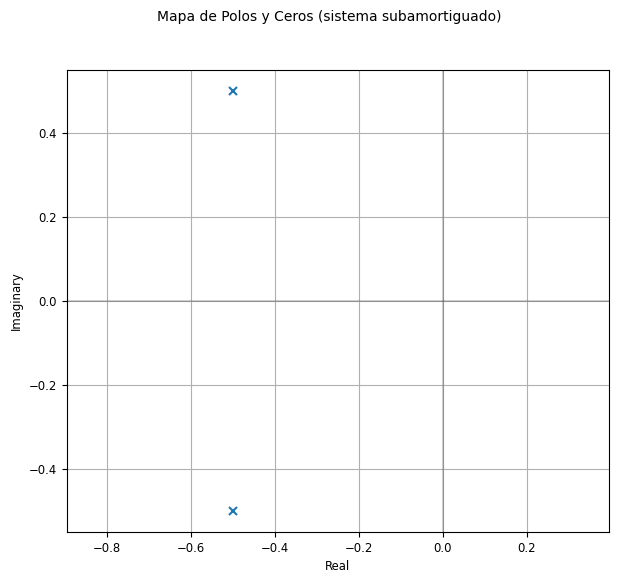

In [26]:
# --- Indicar las raíces de s (Polos del sistema). ---
# Para un sistema subamortiguado, esperamos complejos conjugados con parte real negativa.
# Usamos la función ct.poles() para obtener las raíces del denominador.
polos = ct.poles(sistema_subamortiguado)

# Imprimimos el resultado.
print("Las raíces de s (polos) son:")
print(polos)

# --- Visualización del Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))
ct.pzmap(sistema_subamortiguado, title='Mapa de Polos y Ceros (sistema subamortiguado)')
plt.grid(True)
plt.show()

Las raíces de s (polos) son:
[-0.5+0.5j -0.5-0.5j]


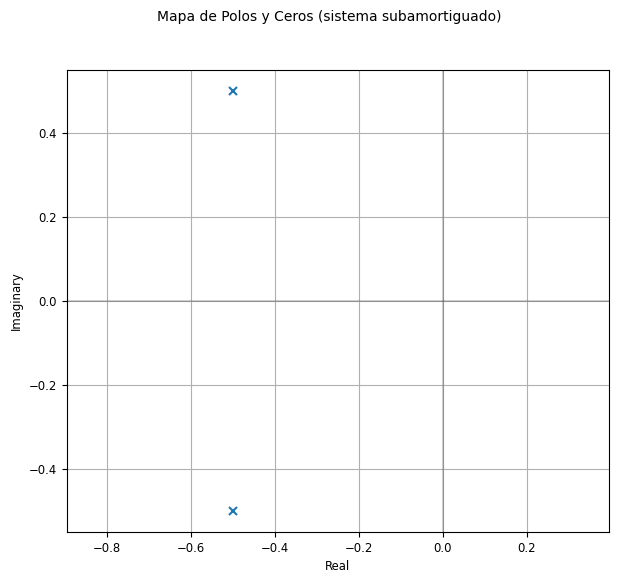

In [27]:
# --- Indicar las raíces de s (Polos del sistema). ---
# Para un sistema subamortiguado, esperamos complejos conjugados con parte real negativa.
# Usamos la función ct.poles() para obtener las raíces del denominador.
polos = ct.poles(sistema_subamortiguado)

# Imprimimos el resultado.
print("Las raíces de s (polos) son:")
print(polos)

# --- Visualización del Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))
ct.pzmap(sistema_subamortiguado, title='Mapa de Polos y Ceros (sistema subamortiguado)')
plt.grid(True)
plt.show()

#### Paso 3.c) Graficar la respuesta del sistema.

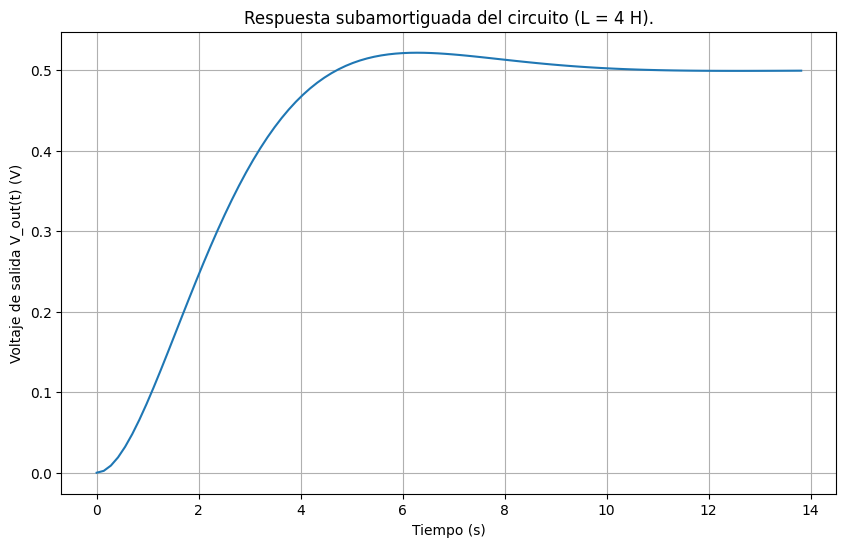

In [28]:
# --- Simulación de la respuesta al escalón unitario. ---
# Calculamos la respuesta del sistema a una entrada de 1 V.
# t es el vector de tiempo y vout_subamortiguado es el vector de la salida V_out(t).
t, vout_subamortiguado = ct.step_response(sistema_subamortiguado)

# --- Graficación de la respuesta. ---
plt.figure(figsize=(10, 6))
plt.plot(t, vout_subamortiguado)
plt.title('Respuesta subamortiguada del circuito (L = 4 H).')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.grid(True)
plt.show()

#### Ejercicio propuesto. Análisis de las respuestas críticamente amortiguada y sobreamortiguada.

Ahora que hemos analizado y simulado el caso subamortiguado, tu tarea es encontrar los valores de $L$ que producen las respuestas críticamente amortiguada y sobreamortiguada.

**Instrucciones:**

1.  **Respuesta Críticamente Amortiguada:**
    Recuerde que la ecuación característica del sistema es:
    $$ \Delta = s^2 (LCR_1) + s(L + R_1 R_2 C) + (R_1 + R_2) = 0 $$
    
    Manteniendo $R_1 = 2 \, \Omega$, $R_2 = 2 \, \Omega$ y $C = 1 \, F$, determina analíticamente 
    el valor de $L$ que hace que el discriminante del polinomio característico ($b^2-4ac$) sea igual a cero. 
    $$ \implies (L + R_1 R_2 C)^2 - 4 \cdot (LCR_1) \cdot (R_1 + R_2) = 0 $$

    Esto resultará en dos polos negativos, reales e iguales.
    * Muestra tu cálculo en una celda de Markdown.
    * En una celda de código, utiliza ese valor de $L$ para crear la nueva función de transferencia; obtener y visualizar el mapa de polos y ceros; y generar la gráfica de su respuesta al escalón.
    
2.  **Respuesta Sobreamortiguada:**
    * Elige un valor de $L$ adecuado (valor propuesto con base en el análisis del valor para el caso críticamente amortiguado y el que se propuso al inicio para el caso subamortiguado).
    * Demuestra analíticamente que, con este nuevo valor de $L$, las raíces son dos números reales, distintos y negativos. Incluye este análisis en una celda de Markdown.
    * En una celda de código, utiliza ese valor de $L$ para crear la nueva función de transferencia; obtener y visualizar el mapa de polos y ceros; y generar la gráfica de su respuesta al escalón.

3.  **Gráfica comparativa:**
    * En una celda final, crea un único script que grafique las tres respuestas (subamortiguada, críticamente amortiguada y sobreamortiguada) en la misma figura.
    * Usa `plt.legend()` para identificar claramente cada curva. Esto te permitirá visualizar directamente cómo el cambio en un solo elemento afecta la dinámica del sistema.

##### **SOLUCIÓN**

***RESPUESTA CRÍTICAMENTE AMORTIGUADA***

$$ \implies (L + R_1 R_2 C)^2 - 4 \cdot (LCR_1) \cdot (R_1 + R_2) = 0 $$
$$ \implies (L + (2)(2)(1))^2 - 4 \cdot (L(1)(2)) \cdot (2 + 2) = 0 $$
$$ \implies (L + 4)^2 - 4 \cdot (2L) \cdot (4) = 0 $$
$$ \implies (L + 4)^2 - 4 \cdot (8L) = 0 $$
$$ \implies (L + 4)^2 - (32L) = 0 $$
$$ \implies (L^2 + 8L + 16) - (32L) = 0 $$
$$ \implies (L^2 - 24L + 16) = 0 $$


$$ L = \frac{-b \pm \sqrt{b^2-4ac}}{2a} $$
$$ L = \frac{-(-24) \pm \sqrt{(-24)^2-4(1)(16)}}{2(1)} $$
$$ L = \frac{24 \pm \sqrt{576 - 4(16)}}{2(1)} $$
$$ L = \frac{24 \pm \sqrt{512}}{2} $$
$$ L = \frac{24 \pm 16\sqrt{2}}{2} $$
$$ L = {12 \pm 8\sqrt{2}} $$
$$ L_1 = {12 + 8\sqrt{2}} = 23.313 $$
$$ L_2 = {12 - 8\sqrt{2}} = 0.6863 $$

Tenemos entonces:

$R_1 = 2 \, \Omega$

$R_2 = 2 \, \Omega$

$C = 1 \, F$

$L_1 = 23.313 \, H$ 

$L_2 = 0.6863 \, H$ 


Sustituimos los valores en el polinomio característico con $L_1$:
$$ s^2 (LCR_1) + s(L + R_1 R_2 C) + (R_1 + R_2) = 0 $$
$$ s^2 ((23.313)(1)(2)) + s((23.313) + (2)(2)(1)) + (2 + 2) = 0 $$
$$ s^2 (46.627) + s(23.313 + 4) + (4) = 0 $$
$$ s^2 (46.627) + s(27.313) + (4) = 0 $$

Ahora sustituimos los valores en el polinomio característico con $L_2$:
$$ s^2 (LCR_1) + s(L + R_1 R_2 C) + (R_1 + R_2) = 0 $$
$$ s^2 ((0.6863)(1)(2)) + s((0.6863) + (2)(2)(1)) + (2 + 2) = 0 $$
$$ s^2 (1.372) + s(0.6863 + 4) + (4) = 0 $$
$$ s^2 (1.372) + s(4.686) + (4) = 0 $$

Calculamos las raíces(polos) usando los valores de $L_1$ y $L_2$:
$$ s = \frac{-b \pm \sqrt{b^2-4ac}}{2a} $$
$$ s = \frac{-27.313 \pm \sqrt{27.313^2-4(46.627)(4)}}{2(46.627)} $$
$$ s = \frac{-27.313 \pm \sqrt{746 - 16(46.627)}}{93.255} $$
$$ s = \frac{-27.313 \pm \sqrt{746 - 746}}{93.255} $$
$$ s = \frac{-27.313 \pm \sqrt{0}}{93.255} $$
$$ s = \frac{-27.313}{93.255} $$
$$ s = -0.2928 $$

$$ s = \frac{-b \pm \sqrt{b^2-4ac}}{2a} $$
$$ s = \frac{-4.686 \pm \sqrt{4.686^2-4(1.372)(4)}}{2(1.372)} $$
$$ s = \frac{-4.686 \pm \sqrt{21.961 - 16(1.372)}}{2.745} $$
$$ s = \frac{-4.686 \pm \sqrt{21.961 - 21.961}}{2.745} $$
$$ s = \frac{-4.686 \pm \sqrt{0}}{2.745} $$
$$ s = \frac{-4.686 }{2.745} $$
$$ s = -1.707 $$

Las raíces son reales, negativas e iguales, por lo tanto la respuesta es criticamente amortiguada.

#### Función de Transferencia.

In [29]:
# Importar las bibliotecas necesarias.
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Parámetros del circuito para una respuesta CRITICAMENTE AMORTIGUADA 1. ---
R1 = 2     # Ohms
R2 = 2     # Ohms
L = 23.313      # Henrios
C = 1      # Faradios

# --- Coeficientes de la Función de Transferencia G(s). ---
# G(s) = num / den
num = [R2]
den = [L*C*R1, (L + R1*R2*C), (R1 + R2)]

# --- Creación del objeto Función de Transferencia. ---
# Usamos la función tf de la biblioteca control.
sistema_crit_amortiguado_1 = ct.tf(num, den)

# Imprimir la función de transferencia para verificarla.
print("La Función de Transferencia 1 es:")
print(sistema_crit_amortiguado_1)


# --- Parámetros del circuito para una respuesta CRITICAMENTE AMORTIGUADA 2. ---
R1 = 2     # Ohms
R2 = 2     # Ohms
L = 0.6863      # Henrios
C = 1      # Faradios

# --- Coeficientes de la Función de Transferencia G(s). ---
# G(s) = num / den
num = [R2]
den = [L*C*R1, (L + R1*R2*C), (R1 + R2)]

# --- Creación del objeto Función de Transferencia. ---
# Usamos la función tf de la biblioteca control.
sistema_crit_amortiguado_2 = ct.tf(num, den)

# Imprimir la función de transferencia para verificarla.
print("\nLa Función de Transferencia 2 es:")
print(sistema_crit_amortiguado_2)

La Función de Transferencia 1 es:
<TransferFunction>: sys[43]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

             2
  -----------------------
  46.63 s^2 + 27.31 s + 4

La Función de Transferencia 2 es:
<TransferFunction>: sys[44]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

             2
  -----------------------
  1.373 s^2 + 4.686 s + 4


#### Visualizar el mapa de polos y ceros.

Las raíces de s1 (polos) son:
[-0.29289452+0.00135776j -0.29289452-0.00135776j]

Las raíces de s2 (polos) son:
[-1.70708874+0.00505158j -1.70708874-0.00505158j]


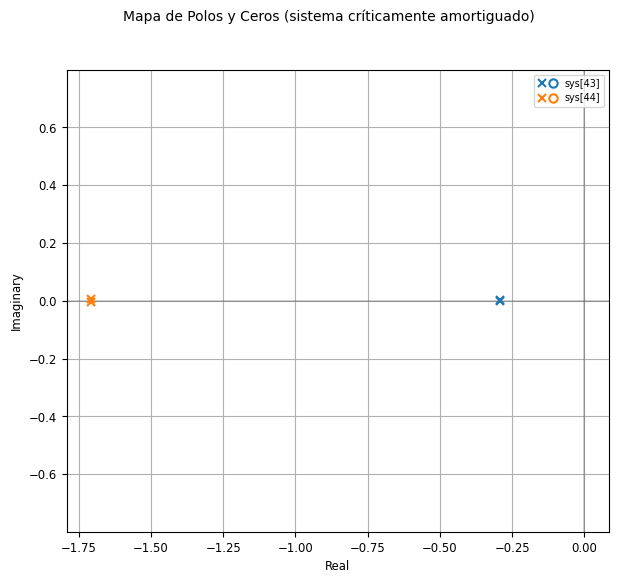

In [30]:
# --- Indicar las raíces de s (Polos del sistema). ---
# Usamos la función ct.poles() para obtener las raíces del denominador.
polos1 = ct.poles(sistema_crit_amortiguado_1)
polos2 = ct.poles(sistema_crit_amortiguado_2)

# Imprimimos el resultado.
print("Las raíces de s1 (polos) son:")
print(polos1)
print("\nLas raíces de s2 (polos) son:")
print(polos2)

# --- Visualización del Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))
ct.pzmap(sistema_crit_amortiguado_1, title='Mapa de Polos y Ceros (sistema críticamente amortiguado)')
ct.pzmap(sistema_crit_amortiguado_2, title='Mapa de Polos y Ceros (sistema críticamente amortiguado)')
plt.grid(True)
plt.show()

#### Graficar la respuesta del sistema.

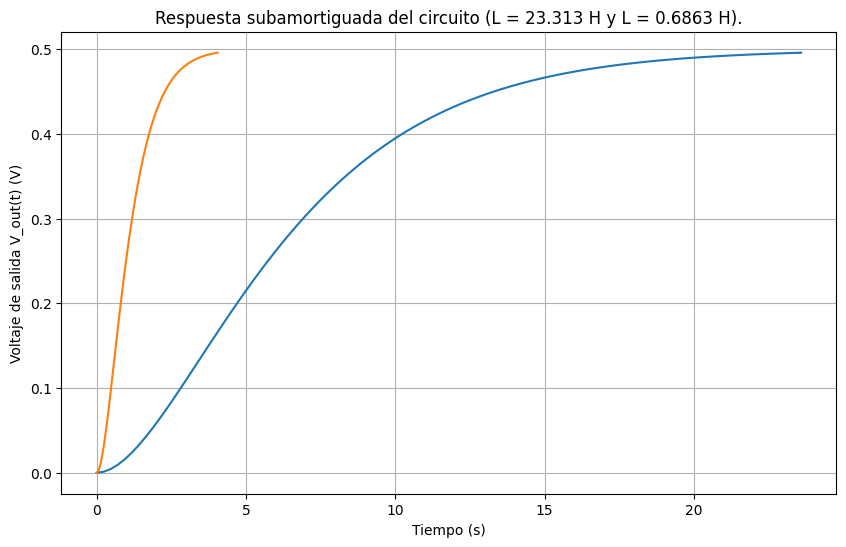

In [31]:
# --- Simulación de la respuesta al escalón unitario. ---
# Calculamos la respuesta del sistema a una entrada de 1 V.
# t es el vector de tiempo y vout_crit_amortiguado es el vector de la salida V_out(t).
t1, vout_crit_amortiguado_1 = ct.step_response(sistema_crit_amortiguado_1)
t2, vout_crit_amortiguado_2 = ct.step_response(sistema_crit_amortiguado_2)

# --- Graficación de la respuesta. ---
plt.figure(figsize=(10, 6))
plt.plot(t1, vout_crit_amortiguado_1)
plt.plot(t2, vout_crit_amortiguado_2)
plt.title('Respuesta subamortiguada del circuito (L = 23.313 H y L = 0.6863 H).')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.grid(True)
plt.show()

##### **SOLUCIÓN**

***RESPUESTA SOBREAMORTIGUADA***

Para obtener una respuesta sobreamortiguada, elegimos un valor de L que hace que el discriminante del polinomio característico sea mayor que cero ($b^2 - 4ac > 0$). Con base en el análisis, se propone un valor de **L = 25 H**.

La ecuación característica del sistema es:
$$s^2(LCR_1) + s(L + R_1R_2C) + (R_1 + R_2) = 0$$

Sustituimos los valores y simplificamos la ecuación:
$$R₁ = 2 Ω$$
$$R₂ = 2 Ω$$
$$C = 1 F$$
$$L = 25 H$$

$$s^2(25 \cdot 1 \cdot 2) + s(25 + (2)(2)(1)) + (2 + 2) = 0$$

$$50s^2 + 29s + 4 = 0$$

Ahora buscamos los polos del sistema:
$$s = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$


$$s = \frac{-29 \pm \sqrt{29^2 - 4(50)(4)}}{2(50)}$$
$$s = \frac{-29 \pm \sqrt{841 - 800}}{100}$$
$$s = \frac{-29 \pm \sqrt{41}}{100}$$

Las dos raíces son:
$$s_1 = \frac{-29 + \sqrt{41}}{100} = -0.226$$
$$s_2 = \frac{-29 - \sqrt{41}}{100} = -0.354$$


Las raíces son reales, distintas y negativas, por lo tanto la respuesta es sobreamortiguada.

#### Función de Transferencia.

In [32]:
# Importar las bibliotecas necesarias.
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Parámetros del circuito para una respuesta SOBFREAMORTIGUADA. ---
R1 = 2     # Ohms
R2 = 2     # Ohms
L = 25     # Henrios
C = 1      # Faradios

# --- Coeficientes de la Función de Transferencia G(s). ---
# G(s) = num / den
num = [R2]
den = [L*C*R1, (L + R1*R2*C), (R1 + R2)]

# --- Creación del objeto Función de Transferencia. ---
# Usamos la función tf de la biblioteca control.
sistema_sobreamortiguado = ct.tf(num, den)

# Imprimir la función de transferencia para verificarla.
print("La Función de Transferencia 1 es:")
print(sistema_sobreamortiguado)

La Función de Transferencia 1 es:
<TransferFunction>: sys[49]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

          2
  -----------------
  50 s^2 + 29 s + 4


#### Visualizar el mapa de polos y ceros.

Las raíces de s (polos) son:
[-0.35403124+0.j -0.22596876+0.j]


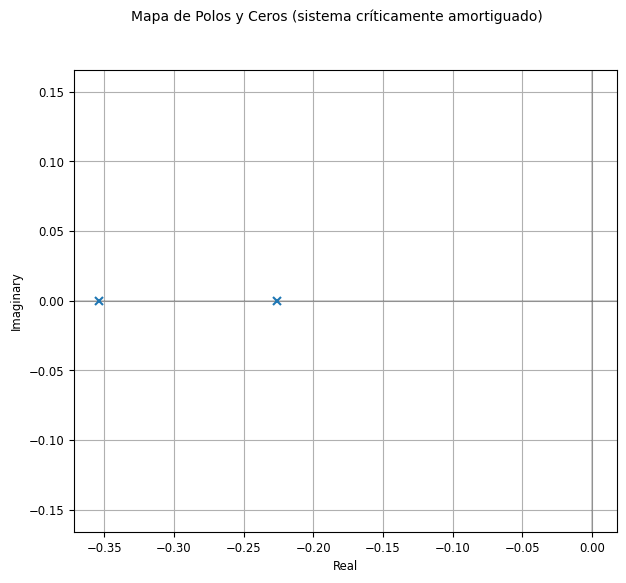

In [33]:
# --- Indicar las raíces de s (Polos del sistema). ---
# Usamos la función ct.poles() para obtener las raíces del denominador.
polos = ct.poles(sistema_sobreamortiguado)

# Imprimimos el resultado.
print("Las raíces de s (polos) son:")
print(polos)

# --- Visualización del Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))
ct.pzmap(sistema_sobreamortiguado, title='Mapa de Polos y Ceros (sistema críticamente amortiguado)')
plt.grid(True)
plt.show()

#### Graficar la respuesta del sistema.

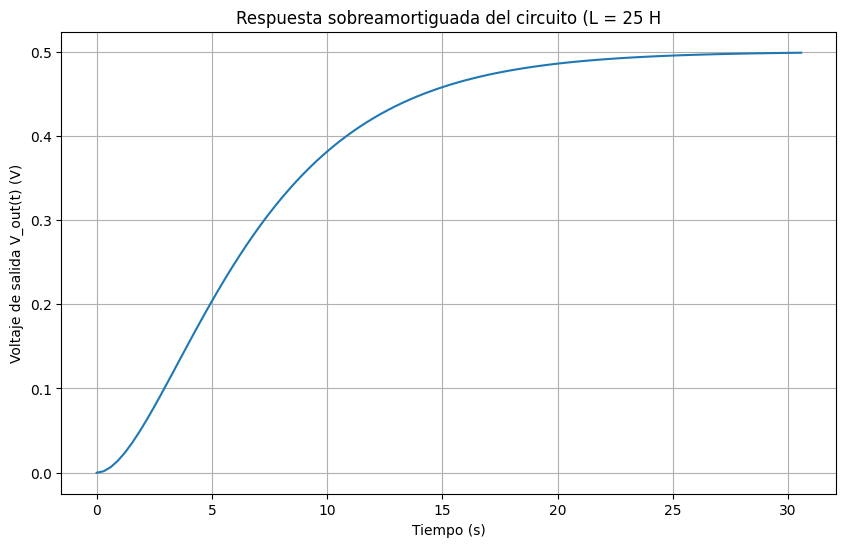

In [34]:
# --- Simulación de la respuesta al escalón unitario. ---
# Calculamos la respuesta del sistema a una entrada de 1 V.
# t es el vector de tiempo y vout_sobreamortiguado es el vector de la salida V_out(t).
t, vout_sobreamortiguado = ct.step_response(sistema_sobreamortiguado)

# --- Graficación de la respuesta. ---
plt.figure(figsize=(10, 6))
plt.plot(t, vout_sobreamortiguado)
plt.title('Respuesta sobreamortiguada del circuito (L = 25 H')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.grid(True)
plt.show()

##### **SOLUCIÓN**

***GRÁFICA COMPARATIVA***

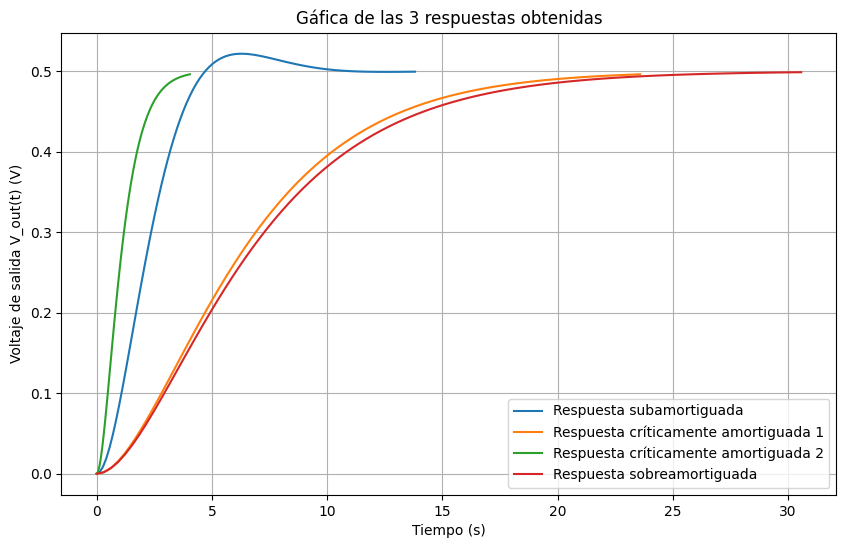

In [35]:
t1, vout_subamortiguado = ct.step_response(sistema_subamortiguado)
t2, vout_crit_amortiguado1 = ct.step_response(sistema_crit_amortiguado_1)
t3, vout_crit_amortiguado2 = ct.step_response(sistema_crit_amortiguado_2)
t4, vout_sobreamortiguado = ct.step_response(sistema_sobreamortiguado)

# --- Graficación de la respuesta. ---
plt.figure(figsize=(10, 6))
plt.plot(t1, vout_subamortiguado, label = 'Respuesta subamortiguada')
plt.plot(t2, vout_crit_amortiguado1, label = 'Respuesta críticamente amortiguada 1')
plt.plot(t3, vout_crit_amortiguado2, label = 'Respuesta críticamente amortiguada 2')
plt.plot(t4, vout_sobreamortiguado, label = 'Respuesta sobreamortiguada')
plt.legend()
plt.title('Gáfica de las 3 respuestas obtenidas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.grid(True)
plt.show()